In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import scipy as sp
from sklearn.metrics import accuracy_score
import matplotlib.cm as cm
pd.set_option('display.width',500)
pd.set_option('display.max_columns',1000)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [2]:
c0=sns.color_palette()[0]
c1=sns.color_palette()[1]
c2 = sns.color_palette()[2]

In [3]:
CreditClient = pd.read_excel("default_ credit_clients.xls", header=1)
C=CreditClient

In [4]:
C=C.rename(columns={'default payment next month':'Y'})

In [6]:
C_X =C.drop(['ID','Y'],axis=1)

In [7]:
C_X.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


## We removed extra features and tried to reach maximum accuracy

In [8]:
C_XX=C_X.drop(['BILL_AMT4','BILL_AMT5','BILL_AMT6'
          ,'PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','LIMIT_BAL','PAY_5','PAY_6','PAY_4'], axis=1)

In [9]:
C_XX.head(2)

,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1
0,2,2,1,24,2,2,-1,3913,3102,689,0
1,2,2,2,26,-1,2,0,2682,1725,2682,0


In [10]:
from sklearn.cross_validation import train_test_split
Xtrain,Xtest,Ytrain, Ytest =train_test_split(C_XX.values,C['Y'].values, random_state=0)

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
clf =GaussianNB()
clf.fit(Xtrain,Ytrain)


GaussianNB()

In [12]:
Ypred = clf.predict(Xtest)
print(metrics.f1_score(Ytest, Ypred))



0.275012321341


In [13]:
print ("Accuracy of Naive Bayes model %.5f" % accuracy_score(Ytest,Ypred))

Accuracy of Naive Bayes model 0.80387


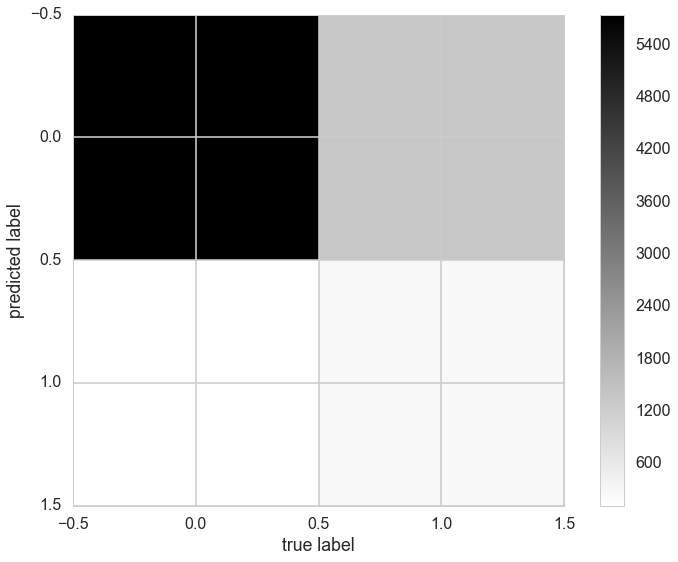

In [14]:

plt.figure()
plt.imshow(metrics.confusion_matrix(Ypred, Ytest),
               interpolation='nearest', cmap=plt.cm.binary)
plt.colorbar()
plt.xlabel("true label")
plt.ylabel("predicted label")
    

After dropping dependant variable model gave better performance

## Plotting Roc Curve

In [15]:
from sklearn import metrics
fpr, tpr, threshold = metrics.roc_curve(Ytest,Ypred)
roc_auc = metrics.auc(fpr, tpr)

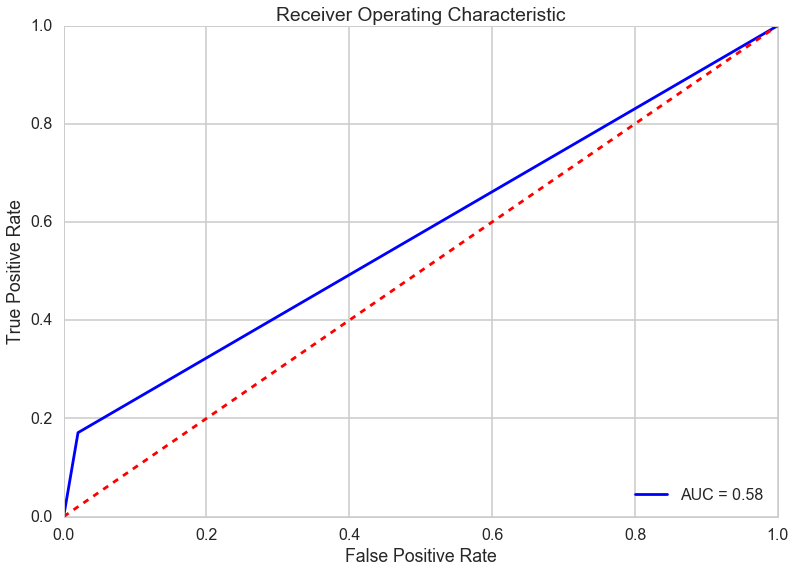

In [16]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()